<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Relatividad y Gravitación</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Problem Set 11</center></b><h2>
<h3><b><center>Tensor momentum energía y cosmología relativistica</center></b><h3>
<h5><center><b>Asignada</b>: Lunes 10 de febrero de 2025</center><h5>
<h5><center><b>Entrega</b>: Lunes 17 de febrero de 2025</center><h5>
<small><center><i>Última actualización del profesor</i>: Lunes 10 de febrero de 2025, 10:00</center></small>

**NOTA**: Al inicio de la solución entregada debe incluir una relación de los puntos y los literales que resolvió completamente.

A continuación se presentan un conjunto de ejercicios o problemas para resolver usando la teoría vista en las últimas lecciones del curso. Resuelva los ejercicios *a mano* y suba una versión digitalizada en el espacio del ítem respectivo en Google Classroom.

**NOTA**: Los ejercicios marcados como **[Numérico]** deben resolverse exclusivamente usando las herramientas numéricas vistas en el curso, incluso si tienen una solución que puede obtenerse de forma enteramente analítica. El objetivo es que se aprendan a utilizar esas herramientas.

###**Solved** $\checkmark$


1. **El
volumen de un Universo cerrado**. Las coordenadas cartesianas de los puntos sobre la superficie de una esfera de radio R (o 2-esfera como se la llamaría de forma general) están descritos en términos de las coordenadas esféricas por las ecuaciones:
  
  $$
  \begin{aligned}
x & =R \sin \theta \cos \phi \\
y & =R \sin \theta \sin \phi \\
z & =R \cos \theta
\end{aligned}
  $$

  1. Partiendo del supuesto que el espacio en el que reside la esfera es euclidiano, ie. que la métrica en coordenadas cartesianas es $\mathrm{d} \ell^2=\mathrm{d} x^2+\mathrm{d} y^2+\mathrm{d} z^2$, pruebe que la métrica de la esfera en coordenadas esféricas es:

   $$
  \mathrm{d} \ell^2=R^2\left(\mathrm{~d} \theta^2+\sin ^2 \theta \mathrm{~d} \phi^2\right)
  $$

  2. Calcule el escalar de curvatura para este espacio y exprese el radio como función de este escalar.

  3. De acuerdo a la geometría diferencial, el diferencial de "volumen" generalizado de una espacio de $n$ dimensiones se calcula como: $
  \mathrm{d} V=\sqrt{g_{11}}\mathrm{~d} x^1 \sqrt{g_{22}}\mathrm{~d} x^n\cdots\sqrt{g_{nn}}\mathrm{~d} x^n$
  
    Usando esta expresión, calcule el volumen generalizado de la 2-esfera (que en su caso sería un área) y muestre que es igual a $4\pi R^2$.

  4. Repita el procedimiento de 1 a 3 para el caso de una 3-esfera de "radio" R, para la cuál las coordenadas cartesianas en un espacio euclidiano embebido de 4 dimensiones están dadas, en términos de las coordenadas hiperesféricas, por:

    \begin{aligned}
x & =R \sin \chi \sin \theta \cos \phi \\
y & =R \sin \chi \sin \theta \sin \phi \\
z & =R \sin \chi \cos \theta \\
w & =R \cos \chi
\end{aligned}
   tenga en cuenta que la coordenada angular adicional $\chi$ varía en el intervalo $0\leq\chi\geq\pi$. Es decir, encuentre la métrica en coordenadas hiperesféricas, calcule el "radio" como función del escalar de curvatura y demuestre que el volumen de la 3-esfera es $2\pi^2 R^3$.
     
  

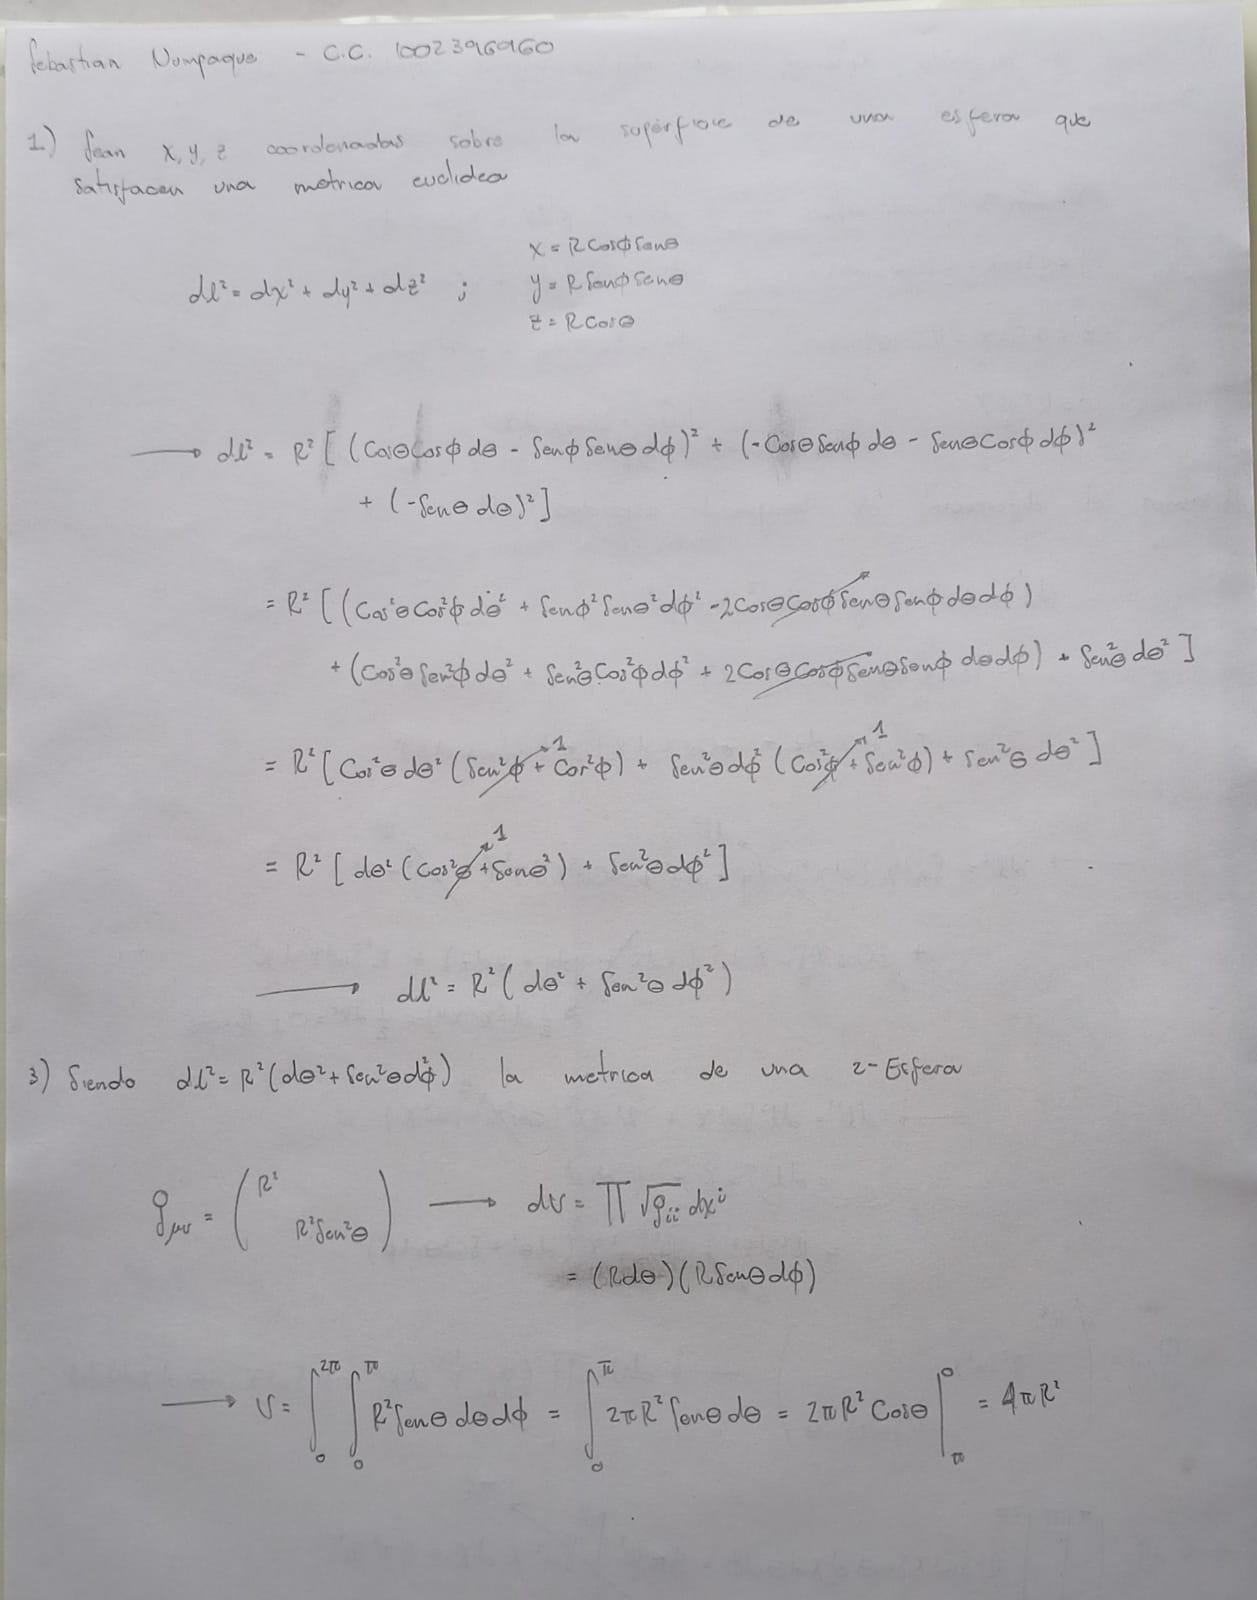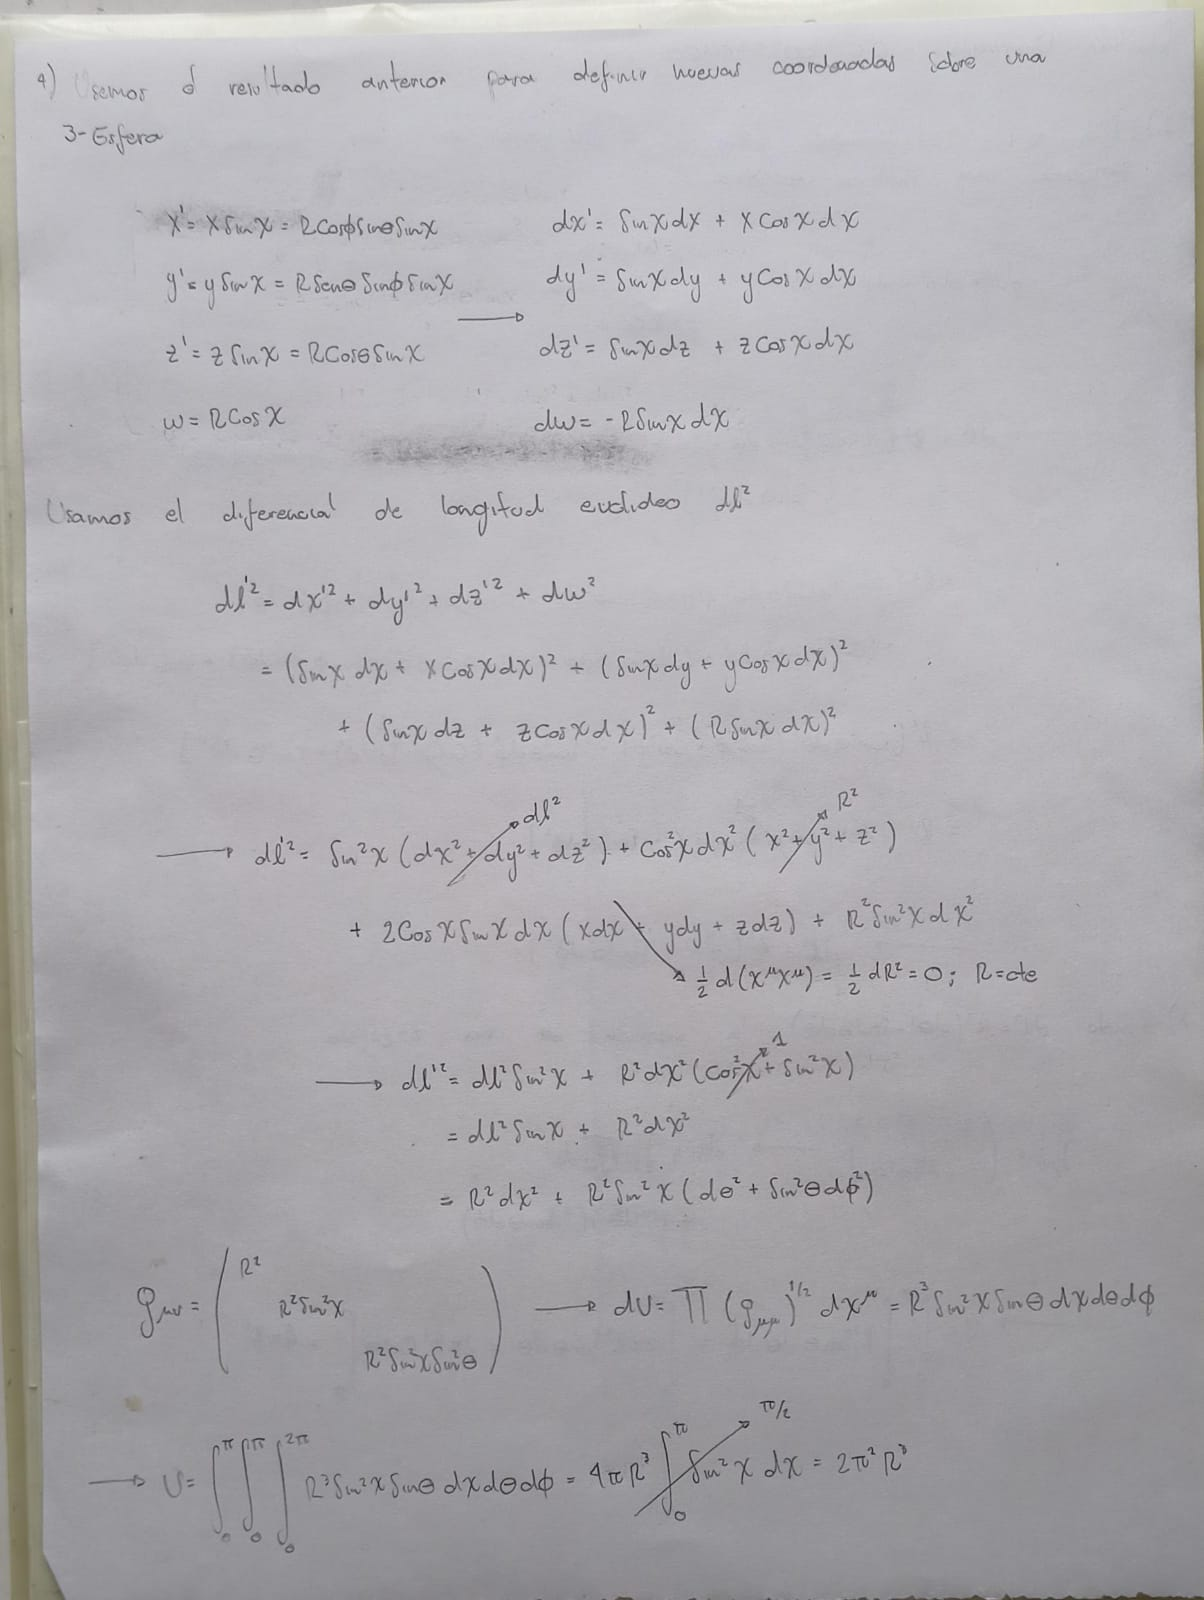

In [ ]:
!pip install -Uq einsteinpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import sympy as sp
import einsteinpy.symbolic as ep

#Printing Variables
from IPython.display import Markdown

###**2 - Esfera**

In [ ]:
# Curvature Scalar
R_scalar_symbol = sp.symbols(r'R^\mu_\mu')

# Variables
R, theta, phi, chi = sp.symbols('R theta phi chi')

# Metric Tensor
g_metric = ep.MetricTensor(sp.diag(R**2, (R*sp.sin(theta))**2).tolist(),
                           (theta, phi))

sp.Eq(sp.Symbol(r'g_{\mu\nu}'), g_metric.tensor(), evaluate = False)

Eq(g_{\mu\nu}, [[R**2, 0], [0, R**2*sin(theta)**2]])

In [ ]:
R_curve = ep.RicciScalar.from_metric(g_metric).tensor()

R_solve  = sp.solve(sp.Eq(R_scalar_symbol, R_curve._array[0]), R)[1]

display(Markdown(f"""
##**Curvature Scalar $R^\mu_\mu$**

$${sp.latex(sp.Eq(R_scalar_symbol, R_curve._array[0], evaluate = False))}$$

##**2-Sphere Radius $R$**

$${sp.latex(sp.Eq(R, R_solve, evaluate = False))}$$
"""
))


##**Curvature Scalar $R^\mu_\mu$**

$$R^{\mu}_{\mu} = \frac{2}{R^{2}}$$

##**2-Sphere Radius $R$**

$$R = \sqrt{2} \sqrt{\frac{1}{R^{\mu}_{\mu}}}$$


###**3 - Esfera**

In [ ]:
g_metric = ep.MetricTensor(sp.diag(R**2, (R*sp.sin(chi))**2,
                                  (R*sp.sin(theta)*sp.sin(chi))**2).tolist(),
                           (theta, phi, chi))

sp.Eq(sp.Symbol(r'g_{\mu\nu}'), g_metric.tensor(), evaluate = False)

Eq(g_{\mu\nu}, [[R**2, 0, 0], [0, R**2*sin(chi)**2, 0], [0, 0, R**2*sin(chi)**2*sin(theta)**2]])

In [ ]:
R_curve = ep.RicciScalar.from_metric(g_metric).tensor()

R_solve  = sp.solve(sp.Eq(R_scalar_symbol, R_curve._array[0]), R)[1]

display(Markdown(f"""
##**Curvature Scalar $R^\mu_\mu$**

$${sp.latex(sp.Eq(R_scalar_symbol, R_curve._array[0], evaluate = False))}$$

##**3-Sphere Radius $R$**

$${sp.latex(sp.Eq(R, R_solve, evaluate = False))}$$
"""
))


##**Curvature Scalar $R^\mu_\mu$**

$$R^{\mu}_{\mu} = \frac{2 \left(1 + \frac{1}{\sin^{4}{\left(\chi \right)} \sin^{2}{\left(\theta \right)}}\right)}{R^{2}}$$

##**3-Sphere Radius $R$**

$$R = \frac{\sqrt{2} \sqrt{\frac{\sin^{4}{\left(\chi \right)} \sin^{2}{\left(\theta \right)} + 1}{R^{\mu}_{\mu}}}}{\sin^{2}{\left(\chi \right)} \sin{\left(\theta \right)}}$$




---



##**Solved** $\checkmark$
2. **Ecuaciones de Friedmann generales**. Partiendo de la métrica de Friedmann-Lemeaitre-Robertson-Walker:

   $$
   \mathrm{d} s^2=c^2 \mathrm{~d} t^2-a^2(t)\left[\frac{\mathrm{d} r^2}{1-K r^2}+r^2\left(\mathrm{~d} \theta^2+\sin ^2 \theta \mathrm{~d} \phi^2\right)\right]
   $$
   y de la ecuación de campo general:

   $$
   R_{\mu \nu}-\frac{1}{2} g_{\mu \nu} R=\frac{8 \pi G}{c^4} T_{\mu \nu}+\Lambda g_{\mu \nu}
   $$
   use el paquete `einsteinpy` para deducir las ecuaciones de Friedmann-Lemaitre generales:

   $$
   \frac{\ddot{a}}{a}=-\frac{4 \pi G}{3}\left(\rho+\frac{3 p}{c^2}\right)+\frac{\Lambda c^2}{3}
   $$
   $$
   \frac{\dot{a}^2+K c^2}{a^2}=\frac{8 \pi G \rho+\Lambda c^2}{3}
   $$

In [ ]:
# Constants
rho, p, pi, G, c, K, Lambda = sp.symbols('rho p pi G c K Lambda')

# Coordinates
r, theta, phi, t = sp.symbols('r theta phi t')

# Scale Factor
a = sp.Function('a')
da = sp.Function(r'\dot{a}')
d2a = sp.Function(r'\ddot{a}')

# Symbolic Subsitutions for 1/c d/dt and 1/c2 d2/dt2
subs = lambda x: sp.factor(x.subs([(a(t).diff(t,2), d2a(t)),
                                   (a(t).diff(t), da(t))]))

In [ ]:
# @markdown ##**FLRW Metric Tensor**
g_metric = ep.MetricTensor(sp.diag(1, -(a(t)/c)**2/(1-K*r**2), -(a(t)*r/c)**2,
                                   -(a(t)*r*sp.sin(theta)/c)**2).tolist(),
                           (t, r, theta, phi))

sp.Eq(sp.Symbol(r'g_{\mu\nu}'), c**2*g_metric.tensor(), evaluate = False)

Eq(g_{\mu\nu}, [[c**2, 0, 0, 0], [0, -a(t)**2/(-K*r**2 + 1), 0, 0], [0, 0, -r**2*a(t)**2, 0], [0, 0, 0, -r**2*a(t)**2*sin(theta)**2]])

In [ ]:
# @markdown ##**Ricci Tensor**
Ricci = subs(ep.RicciTensor.from_metric(g_metric).tensor().simplify())
sp.Eq(sp.Symbol(r'R_{\mu\nu}'), Ricci, evaluate = False)

Eq(R_{\mu\nu}, [[-3*\ddot{a}(t)/a(t), 0, 0, 0], [0, -(2*K*c**2 + \ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)/(c**2*(K*r**2 - 1)), 0, 0], [0, 0, r**2*(2*K*c**2 + \ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)/c**2, 0], [0, 0, 0, r**2*(2*K*c**2 + \ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)*sin(theta)**2/c**2]])

In [ ]:
# @markdown ##**Curvature Scalar**
R = subs(ep.RicciScalar.from_metric(g_metric).tensor())
sp.Eq(sp.symbols('R'), R, evaluate = False)

Eq(R, -6*(K*c**2 + \ddot{a}(t)*a(t) + \dot{a}(t)**2)/a(t)**2)

In [ ]:
# @markdown ##**Einstein Tensor**
G_Einstein = subs(ep.EinsteinTensor.from_metric(g_metric).tensor().simplify())
sp.Eq(sp.Symbol(r'G_{\mu\nu}'), G_Einstein, evaluate = False)

Eq(G_{\mu\nu}, [[3.0*(K*c**2 + \dot{a}(t)**2)/a(t)**2, 0, 0, 0], [0, 2.0*(0.5*K*c**2 + 1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)/(c**2*(K*r**2 - 1)), 0, 0], [0, 0, -2.0*r**2*(0.5*K*c**2 + 1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)/c**2, 0], [0, 0, 0, -2.0*r**2*(0.5*K*c**2 + 1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)*sin(theta)**2/c**2]])

In [ ]:
# @markdown ##**Stress-Momentum-Energy Tensor**
k = 8*pi*G/c**4

T_stress = sp.diag(rho*c*c + p, *[0]*3) - p*g_metric.tensor().tomatrix()

T = (T_stress*g_metric.inv().tensor().tomatrix()).trace().simplify()

display(sp.Eq(sp.Symbol(r'T=T^\mu_\mu'), T, evaluate = False))
print('')
sp.Eq(sp.Symbol(r'T_{\mu\nu}'), T_stress, evaluate = False)

Eq(T=T^\mu_\mu, c**2*rho - 3*p)

Eq(T_{\mu\nu}, Matrix([
[c**2*rho,                              0,                   0,                                 0],
[       0, p*a(t)**2/(c**2*(-K*r**2 + 1)),                   0,                                 0],
[       0,                              0, p*r**2*a(t)**2/c**2,                                 0],
[       0,                              0,                   0, p*r**2*a(t)**2*sin(theta)**2/c**2]]))

In [ ]:
# @markdown ##**$\Lambda g_{\mu\nu}$ Tensor**
Lambda_tensor = c**2*Lambda*g_metric.tensor()

sp.Eq(sp.Symbol(r'\Lambda g_{\mu\nu}'), Lambda_tensor, evaluate = False)

Eq(\Lambda g_{\mu\nu}, [[Lambda*c**2, 0, 0, 0], [0, -Lambda*a(t)**2/(-K*r**2 + 1), 0, 0], [0, 0, -Lambda*r**2*a(t)**2, 0], [0, 0, 0, -Lambda*r**2*a(t)**2*sin(theta)**2]])

In [ ]:
# @markdown ##**Friedmann Equations**
# @markdown $$G_{00}=\frac{8\pi G}{c^4}T_{00} + \Lambda g_{00}$$

sp.Eq(G_Einstein[0,0]/3, (c**2*k*T_stress[0,0] + Lambda_tensor[0,0])/3, evaluate = False)

Eq(1.0*(K*c**2 + \dot{a}(t)**2)/a(t)**2, 8*G*pi*rho/3 + Lambda*c**2/3)

In [ ]:
# @markdown ##**Friedmann Equations**
# @markdown $$R_{00}=\frac{8\pi G}{c^4}(T_{00}-\frac{1}{2}g_{00}T) + \Lambda g_{00}$$

Ricci_stress = c**2*k*(T_stress - g_metric.tensor().tomatrix()*T/2)

sp.Eq(-Ricci[0,0]/3, (-Ricci_stress[0,0].simplify() + Lambda_tensor[0,0])/3, evaluate = False)

Eq(\ddot{a}(t)/a(t), -4*G*pi*(c**2*rho + 3*p)/(3*c**2) + Lambda*c**2/3)

**NOTA**: Algunas correcciones al enunciado pueden ser publicadas con posterioridad a la formulación del problem set. Es importante que este pendiente de la última versión de este documento antes de enviar la solución.